## Importing Necessary Libraries

In [1]:
# Basic Data Manipulation and Regular Expressions.
import pandas as pd
import re
import numpy as np
import string

# Plotly and Matplotlib for Data Visualization.
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS

# Natural Language Processing and Text Analysis.
import nltk
nltk.download('stopwords')
import itertools
from nltk.corpus import stopwords
from collections import Counter
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# TensorFlow and Keras for Deep Learning.
import tensorflow as tf
import random as python_random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, GRU
from keras.optimizers import RMSprop
from keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Scikit-learn for Machine Learning and Model Evaluation.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the Dataset

In [2]:
# Load the dataset and display the first five records.
sar_acc = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
sar_acc['source'] = sar_acc['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
sar_acc.head()

,article_link,headline,is_sarcastic,source
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,huffingtonpost
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,theonion
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,theonion
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost


## Exploratory Data Analysis 

**Pie-Chart for Sarcastic Vs Acclaim**

In [3]:
init_notebook_mode(connected=True)

# Get the count of each class in the dataset, label and define the colors.
sar_acc_tar = sar_acc['is_sarcastic'].value_counts()
labels = ['Acclaim', 'Sarcastic']
sizes = (np.array((sar_acc_tar / sar_acc_tar.sum())*100))
colors = ['#33cccc', '#ccffcc']

# Create the pie chart trace with the data.
trace = go.Pie(labels=labels, values=sizes, opacity=0.8, hoverinfo='label+percent',
               marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
layout = go.Layout(title='Sarcastic Vs Acclaim')
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Sa_Ac")

**Frequently Occuring Words in Headlines**

In [4]:
# Count the occurrences of each word in all headlines.
all_words = sar_acc['headline'].str.split(expand=True).unstack().value_counts()

# Create a bar chart trace with the most frequent words.
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='turbo',
                         color = all_words.values[2:100]
                        ),
            #text='Word counts'
    )]

# Define the layout of the chart with a title.
layout = go.Layout(
    title='Frequent Occuring word in Headlines'
)

# Create a Figure object containing the data and layout.
fig = go.Figure(data=data, layout=layout)

# Render the plot inline in the notebook.
iplot(fig, filename='basic-bar')

## Data Pre-processing

**Tokenization** 

In [5]:
sar_det = sar_acc[sar_acc.is_sarcastic==1]
sar_det.reset_index(drop=True, inplace=True)
acc_det = sar_acc[sar_acc.is_sarcastic==0]
acc_det.reset_index(drop=True, inplace=True)

# Tokenizing the Headlines of Sarcasm.
sar_news = []
for rows in range(0, sar_det.shape[0]):
    head_txt = sar_det.headline[rows]
    head_txt = head_txt.split(" ")
    sar_news.append(head_txt)

# Converting into a single list for Sarcasm.
sar_list = list(itertools.chain(*sar_news))

# Tokenizing the Headlines of Acclaim.
acc_news = []
for rows in range(0, acc_det.shape[0]):
    head_txt = acc_det.headline[rows]
    head_txt = head_txt.split(" ")
    acc_news.append(head_txt)
    
# Converting into a single list for Acclaim.
acc_list = list(itertools.chain(*acc_news))

**Stopword Removal**

In [6]:
# Get a list of stopwords from NLTK.
stopwords = nltk.corpus.stopwords.words('english')

# Remove stopwords from the sarcasm and acclaim words list.
sar_list_restp = [word for word in sar_list if word.lower() not in stopwords]
acc_list_restp = [word for word in acc_list if word.lower() not in stopwords]

# Print the length of the lists before and after stopwords removal for sarcasm words.
print("Length of original Sarcasm list: {0} words\n"
      "Length of Sarcasm list after stopwords removal: {1} words"
      .format(len(sar_list), len(sar_list_restp)))

# Print a separator.
print("=="*46)

# Print the length of the lists before and after stopwords removal for acclaim words.
print("Length of original Acclaim list: {0} words\n"
      "Length of Acclaim list after stopwords removal: {1} words"
      .format(len(acc_list), len(acc_list_restp)))

Length of original Sarcasm list: 115898 words
Length of Sarcasm list after stopwords removal: 87458 words
Length of original Acclaim list: 147128 words
Length of Acclaim list after stopwords removal: 103525 words


**Top 30 Most Occuring Words after Removing Stopwords from the Headlines**

In [7]:
# Data cleaning for getting top 30.
sar_cnt = Counter(sar_list_restp)
acc_cnt = Counter(acc_list_restp)

# Dictonary to Dataframe.
sar_cnt_df = pd.DataFrame(list(sar_cnt.items()), columns = ['Words', 'Freq'])
sar_cnt_df = sar_cnt_df.sort_values(by=['Freq'], ascending=False)
acc_cnt_df = pd.DataFrame(list(acc_cnt.items()), columns = ['Words', 'Freq'])
acc_cnt_df = acc_cnt_df.sort_values(by=['Freq'], ascending=False)

# Top 30.
sar_cnt_df_30 = sar_cnt_df.head(30)
acc_cnt_df_30 = acc_cnt_df.head(30)

In [8]:
# Create a horizontal bar chart for the top 30 sarcasm words.
sar_tr  = go.Bar(
    x=sar_cnt_df_30['Freq'],
    y=sar_cnt_df_30['Words'],
    name='Sarcasm',
    marker=dict(
        color='rgba(67, 226, 59, 0.45)',
        line=dict(
            color='rgba(67, 226, 59, 0.45)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

# Create a horizontal bar chart for the top 30 acclaim words.
acc_tr  = go.Bar(
    x=acc_cnt_df_30['Freq'],
    y=acc_cnt_df_30['Words'],
    name='Acclaim',
    marker=dict(
        color='rgba(59, 226, 221, 0.8)',
        line=dict(
            color='rgba(59, 226, 221, 0.8)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

# Prepare the layout for a subplot.
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top 30 Most Occuring Words in Sarcasm Headlines',
                                                          'Top 30 Most Occuring Words in Acclaim Headlines'))

fig.append_trace(sar_tr, 1, 1)
fig.append_trace(acc_tr, 2, 1)


fig['layout'].update(height=1200, width=800)

# Display the figure inline in the notebook.
iplot(fig, filename='sar_vs_acc')

C:\Users\ashly\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Lemmatization**

In [9]:
lemm = WordNetLemmatizer()

# Sarcasm headline after Lemmatization.
sar_wost_lem = []
for batch in sar_news:
    sar_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    sar_list_lemm =  [lemm.lemmatize(word) for word in sar_list_restp]
    sar_wost_lem.append(sar_list_lemm)

# Acclaim headline after Lemmatization.
acc_wost_lem = []
for batch in acc_news:
    acc_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    acc_list_lemm =  [lemm.lemmatize(word) for word in acc_list_restp]
    acc_wost_lem.append(sar_list_lemm)

**Vectorization**

In [10]:
vec = []
for block in sar_wost_lem:
    # Initialize the CountVectorizer.
    vectorizer = CountVectorizer(min_df=0)
    sentence_transform = vectorizer.fit_transform(block) # Fit and transform the text block.
    vec.append(sentence_transform)
    
# Display the features and the last transformed text block as an array.    
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['christmas', 'francis', 'got', 'pope', 'sweater', 'vestment', 'wearing']

The vectorized array looks like:
 [[0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


C:\Users\ashly\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



**N-grams**

In [11]:
sar_wost_lem_df = pd.DataFrame({'sarcasm':sar_wost_lem})
acc_wost_lem_df = pd.DataFrame({'acclaim':acc_wost_lem})

# Custom function for ngram generation.
def generate_ngrams(text, n_gram=1):
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Custom function for horizontal bar chart.
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Plotting the Bigram plot.
freq_dict = defaultdict(int)
for sent in sar_wost_lem_df["sarcasm"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
sar_2 = horizontal_bar_chart(fd_sorted.head(50), '#CF2F5F')


freq_dict = defaultdict(int)
for sent in acc_wost_lem_df["acclaim"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
acc_2 = horizontal_bar_chart(fd_sorted.head(50), '#6B9FC2')

# Creating two subplots.
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of Sarcasm Headlines", 
                                          "Frequent bigrams of Acclaim Headlines"])
fig.append_trace(sar_2, 1, 1)
fig.append_trace(acc_2, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots Sarcasm Vs Acclaim after removing Stopwords")
iplot(fig, filename='word-plots')

In [12]:
# Plotting Trigrams.
freq_dict = defaultdict(int)
for sent in sar_wost_lem_df["sarcasm"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
sar_2 = horizontal_bar_chart(fd_sorted.head(50), '#CF2F5F')


freq_dict = defaultdict(int)
for sent in acc_wost_lem_df["acclaim"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
acc_2 = horizontal_bar_chart(fd_sorted.head(50), '#6B9FC2')

# Creating two subplots.
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent Trigrams of Sarcasm Headlines", 
                                          "Frequent Trigrams of Acclaim Headlines"])
fig.append_trace(sar_2, 1, 1)
fig.append_trace(acc_2, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Plots Sarcasm Vs Acclaim after removing Stopwords")
iplot(fig, filename='word-plots')

**Meta-features**

In [13]:
# Number of words in the text.
sar_acc["num_words"] = sar_acc["headline"].apply(lambda x: len(str(x).split()))

# Number of unique words in the text.
sar_acc["num_unique_words"] = sar_acc["headline"].apply(lambda x: len(set(str(x).split())))

# Number of characters in the text.
sar_acc["num_chars"] = sar_acc["headline"].apply(lambda x: len(str(x)))

# Number of stopwords in the text.
sar_acc["num_stopwords"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# Number of punctuations in the text.
sar_acc["num_punctuations"] =sar_acc['headline'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

# Number of title case words in the text.
sar_acc["num_words_upper"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Number of title case words in the text.
sar_acc["num_words_title"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Average length of the words in the text.
sar_acc["mean_word_len"] = sar_acc["headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\Users\ashly\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\ashly\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\ashly\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\ashly\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\ashly\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

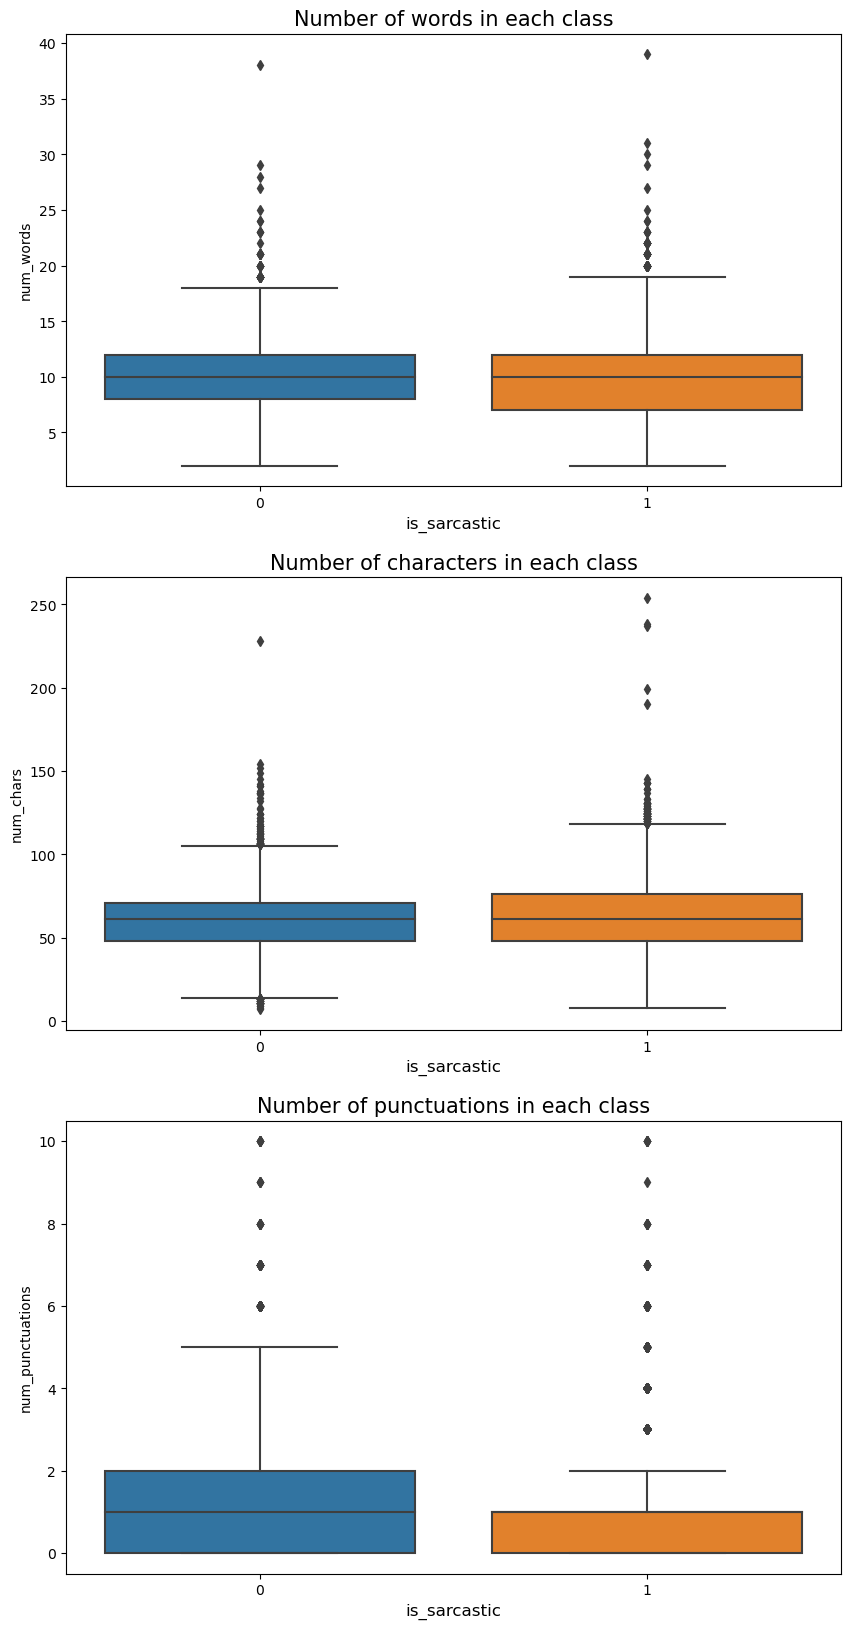

In [14]:
# Truncate some extreme values for better visuals.
color = sns.color_palette()

# Directly modify the DataFrame without creating a copy.
sar_acc.loc[sar_acc['num_words'] > 60, 'num_words'] = 60
sar_acc.loc[sar_acc['num_punctuations'] > 10, 'num_punctuations'] = 10
sar_acc.loc[sar_acc['num_chars'] > 350, 'num_chars'] = 350

# Create the boxplots.
f, axes = plt.subplots(3, 1, figsize=(10, 20))
sns.boxplot(x='is_sarcastic', y='num_words', data=sar_acc, ax=axes[0])
axes[0].set_xlabel('is_sarcastic', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_chars', data=sar_acc, ax=axes[1])
axes[1].set_xlabel('is_sarcastic', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_punctuations', data=sar_acc, ax=axes[2])
axes[2].set_xlabel('is_sarcastic', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)

plt.show()

##  Model Building

## A. Topic Modeling

## LDA

**Data Preparation**

In [42]:
text_data = sar_acc['headline'].values.tolist()

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_tokenize(document):
    stop_words = set(stopwords.words('english'))
    # Removing special characters and digits.
    document = re.sub(r'\W', ' ', str(document))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    tokens = document.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the function to the text data.
processed_data = [clean_tokenize(doc) for doc in text_data]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Create a dictionary from 'processed_data' containing the number of times a word appears.
dictionary = corpora.Dictionary(processed_data)

# Create a corpus from the dictionary.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_data]

**Building the Model**

In [47]:
# Building the LDA model.
lda = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
               update_every=1, chunksize=100, passes=50, alpha='auto', per_word_topics=True)

num_words = 7  
topics = lda.print_topics(num_topics=7, num_words=num_words)

for idx, topic in topics:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.026*"american" + 0.025*"report" + 0.021*"woman" + 0.020*"area" + 0.016*"america" + 0.012*"could" + 0.011*"ban"
Topic: 1 
Words: 0.052*"man" + 0.019*"obama" + 0.016*"day" + 0.015*"first" + 0.015*"still" + 0.011*"ever" + 0.010*"clinton"
Topic: 2 
Words: 0.042*"trump" + 0.012*"donald" + 0.011*"like" + 0.010*"house" + 0.010*"women" + 0.010*"best" + 0.008*"white"
Topic: 3 
Words: 0.022*"year" + 0.021*"one" + 0.019*"says" + 0.015*"old" + 0.015*"make" + 0.011*"fall" + 0.010*"tips"
Topic: 4 
Words: 0.017*"got" + 0.015*"2" + 0.015*"mom" + 0.014*"ryan" + 0.014*"free" + 0.013*"2014" + 0.010*"bad"
Topic: 5 
Words: 0.012*"get" + 0.012*"world" + 0.011*"school" + 0.009*"pope" + 0.009*"look" + 0.009*"3" + 0.008*"francis"
Topic: 6 
Words: 0.047*"new" + 0.014*"people" + 0.014*"time" + 0.012*"life" + 0.012*"nation" + 0.011*"back" + 0.011*"5"


**Evaluation**

In [48]:
# Use the CoherenceModel to calculate coherence.
coherence_model_lda = CoherenceModel(model=lda, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)

Coherence Score:  0.44181461928690713


**Visualisation**

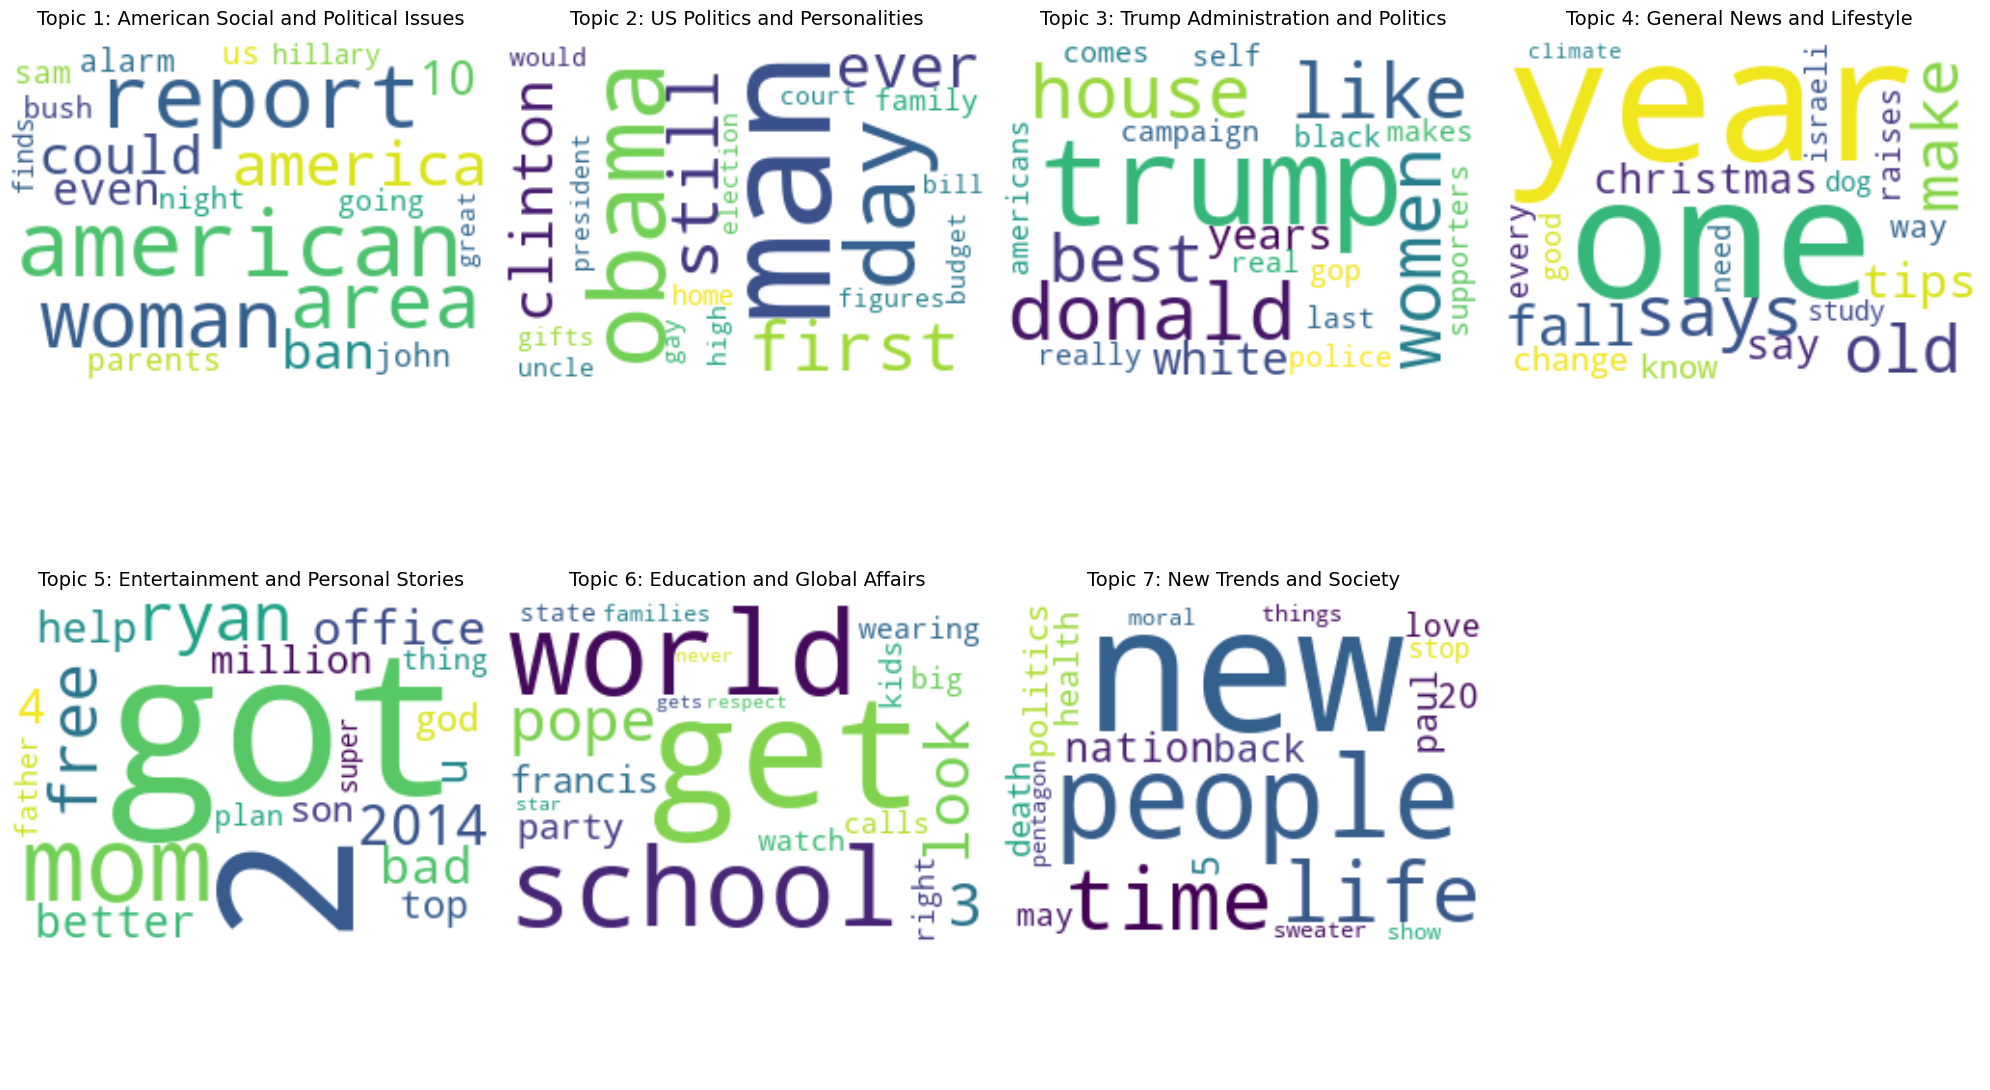

In [49]:
# Function to create word clouds for LDA topics.
def create_word_clouds(lda_model, num_topics, custom_labels):
    # Increase the figure size.
    fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharex=True, sharey=True)

    # Iterate through the topics and create word clouds.
    for i in range(num_topics):
        # Find the appropriate subplot.
        ax = axes[i // 4, i % 4]

        # Generate the word cloud for each topic.
        topic_words = dict(lda_model.show_topic(i, 20))
        cloud = WordCloud(background_color='white', width=250, height=180, max_words=20).generate_from_frequencies(topic_words)
        
        # Display the word cloud.
        ax.imshow(cloud, interpolation='bilinear')
        # Adjust the title placement and font size.
        ax.set_title('Topic ' + str(i+1) + ': ' + custom_labels[i], fontdict=dict(size=14), pad=12)
        ax.axis('off')

    # Hide the last subplot if there are an odd number of topics.
    if num_topics % 8 != 0:
        axes[-1, -1].axis('off')

    # Adjust the layout and spacing.
    plt.subplots_adjust(wspace=0.1, hspace=0.4)
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

# Define the custom labels for each topic.
custom_labels = [
    "American Social and Political Issues",
    "US Politics and Personalities",
    "Trump Administration and Politics",
    "General News and Lifestyle",
    "Entertainment and Personal Stories",
    "Education and Global Affairs",
    "New Trends and Society"
]

# Create the word clouds for each topic.
create_word_clouds(lda, 7, custom_labels)

## B. Sarcasm Detection

## RNN + CNN with GloVe Embeddings, Bidirectional LSTM and GRU Layers

**Data Preparation**  

In [14]:
# Getting X and Y ready.
X = sar_acc.headline
Y = sar_acc.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

**Split into Train and Test Data**

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

**Processing the Data for the Model**  

In [16]:
max_words = 1000 # The maximum number of words to keep, based on word frequency.
max_len = 150 # The maximum length of all sequences.
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train) # Fit the tokenizer on the training texts.
sequences = tok.texts_to_sequences(X_train) # Convert the texts to sequences of integers.
sequences_matrix = pad_sequences(sequences, maxlen=max_len) # Pad sequences to ensure they all have the same length for model input.

In [17]:
# Path to the GloVe file.
glove_path = 'glove.6B.100d.txt'

# Load GloVe vectors into a dictionary.
embeddings_index = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

In [18]:
embedding_dim = 100  # The dimensionality of the GloVe word vectors.
max_words = min(max_words, len(tok.word_index) + 1)  
embedding_matrix = np.zeros((max_words, embedding_dim))

# Loop over all words in the word index obtained from the tokenizer.
for word, i in tok.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

**Model Definition and Training**

In [19]:
# Define a seed value.
seed_value= 123 

# Set the `PYTHONHASHSEED` environment variable at a fixed value.
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# Set the Python built-in pseudo-random generator at a fixed value.
python_random.seed(seed_value)

# Set the numpy pseudo-random generator at a fixed value.
np.random.seed(seed_value)

# Set the TensorFlow pseudo-random generator at a fixed value.
tf.random.set_seed(seed_value)

In [20]:
def enhanced_RNN_with_CNN():
    inputs = Input(name='inputs', shape=[max_len])
    
    # Embedding layer.
    layer = Embedding(
        max_words, 
        embedding_dim, 
        weights=[embedding_matrix], 
        input_length=max_len, 
        trainable=True 
    )(inputs)
    
    # CNN layers.
    layer = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(layer)
    layer = MaxPooling1D(pool_size=2)(layer)
    
    # Adding a Bidirectional LSTM layer.
    layer = Bidirectional(LSTM(64, return_sequences=True))(layer)
    
    # Adding a GRU layer.
    layer = GRU(32, return_sequences=False)(layer)
    
    # Regularization with Dropout.
    layer = Dropout(0.5)(layer)
    
    # Fully connected layers with L1/L2 regularization.
    layer = Dense(128, name='FC1', activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64, name='FC2', activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(layer)
    
    # Output layer.
    layer = Dense(1, name='out_layer', activation='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

# Create the enhanced model.
enhanced_model = enhanced_RNN_with_CNN()
enhanced_model.summary()
enhanced_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define the EarlyStopping callback with adjusted parameters.
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model.
history = enhanced_model.fit(
    sequences_matrix, 
    Y_train, 
    batch_size=100, 
    epochs=10, 
    validation_split=0.1, 
    callbacks=[early_stopping]
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 150, 64)           19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 64)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 75, 128)          66048     
 l)                                                              
                                                                 
 gru (GRU)                   (None, 32)                15552 

**Model Prediction and Evaluation**

In [21]:
# Convert the test texts to sequences of integers using the same tokenizer instance.
test_sequences = tok.texts_to_sequences(X_test)

# Pad the sequences so that they all have the same length for model input.
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

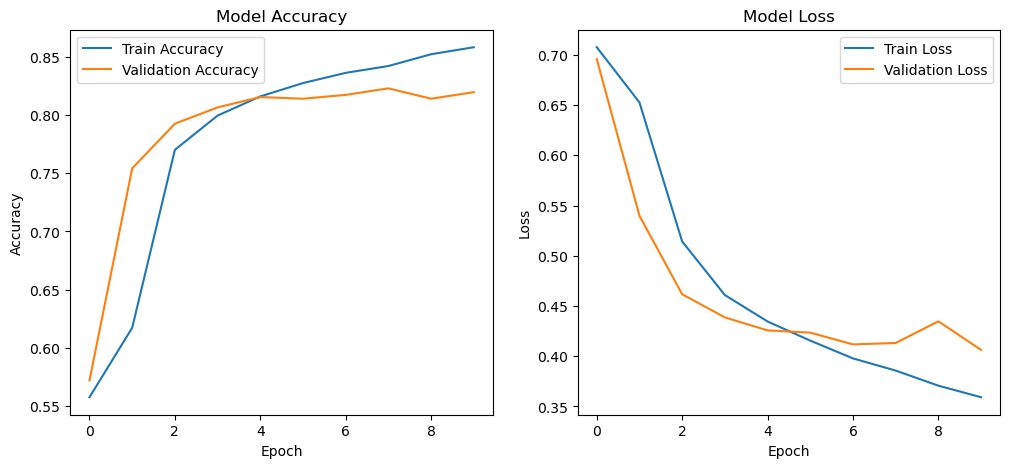

In [22]:
# Plotting training & validation accuracy.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
# Evaluating the model.
loss, accuracy = enhanced_model.evaluate(test_sequences_matrix, Y_test)
print("Test Accuracy:", accuracy)
print("Loss:", loss)

167/167 [==============================] - 5s 31ms/step - loss: 0.4067 - accuracy: 0.8220
Test Accuracy: 0.8219767808914185
Loss: 0.4067038595676422


In [24]:
# Generate predictions.
pred_probabilities = enhanced_model.predict(test_sequences_matrix)
pred_classes = (pred_probabilities > 0.5).astype(int).flatten()

167/167 [==============================] - 6s 30ms/step


Accuracy: 0.8219767877199551
Precision: 0.7886044591246903
Recall: 0.8131119625372499
F1 Score: 0.8006707189268498
Confusion Matrix:
[[2481  512]
 [ 439 1910]]


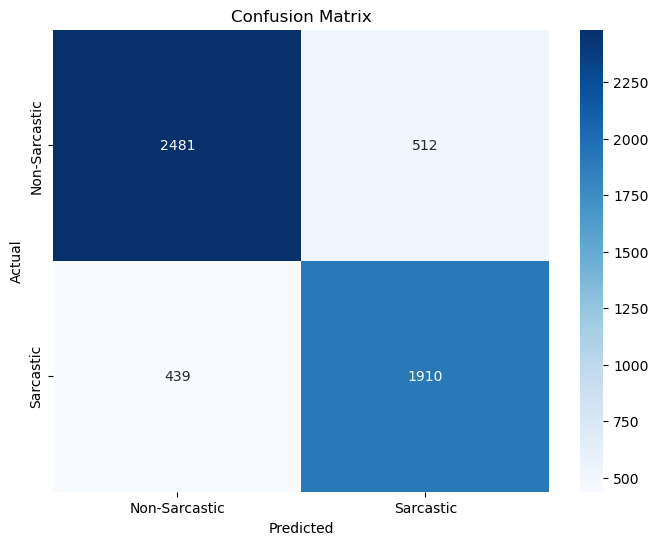

In [25]:
# True labels.
Y_test_true = Y_test.flatten()

# Calculate metrics.
accuracy = accuracy_score(Y_test_true, pred_classes)
precision = precision_score(Y_test_true, pred_classes)
recall = recall_score(Y_test_true, pred_classes)
f1 = f1_score(Y_test_true, pred_classes)

# Print metrics.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate and print confusion matrix.
conf_matrix = confusion_matrix(Y_test_true, pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Create labels for the plot.
class_names = ['Non-Sarcastic', 'Sarcastic'] 

# Create the heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title.
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Display the plot.
plt.show()

**Save Results to a .csv File**

In [27]:
# Create a DataFrame.
results_rnn_df = pd.DataFrame({
    'Actual': Y_test_true,
    'Predicted': pred_classes.flatten()
})

# Save to CSV file
results_rnn_df.to_csv('sarcasm_detection_results_RNN.csv', index=False)

## Random Forest

**Data Preparation**

In [28]:
X = sar_acc.headline
Y = sar_acc.is_sarcastic

In [29]:
# Initialize a TF-IDF Vectorizer.
tfidf = TfidfVectorizer(max_features=1000)  

# Fit and transform the text data.
X_tfidf = tfidf.fit_transform(X).toarray()

**Split into Train and Test Data**

In [30]:
# Split the data.
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)

**Fitting the Model on the Training Data**

In [31]:
# Updated Random Forest classifier with the best parameters.
rf_classifier = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest.
    criterion='gini',        # Measure the quality of a split.
    min_samples_split=2,     # Minimum number of samples required to split a node.
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node.
    random_state=42          # Random state for reproducibility.
)

# Train the classifier.
rf_classifier.fit(X_train, Y_train.ravel())

RandomForestClassifier(n_estimators=200, random_state=42)

**Testing the Model**

In [32]:
# Make predictions.
Y_pred = rf_classifier.predict(X_test)

**Model Evaluation**

Accuracy: 0.7897791089479596
Precision: 0.7636912462268219
Recall: 0.7549019607843137
F1 Score: 0.7592711682743838
Confusion Matrix:
[[2448  548]
 [ 575 1771]]


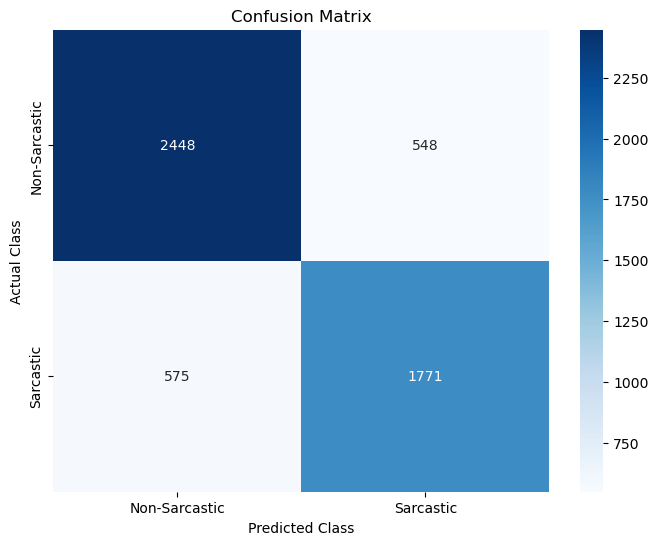

In [33]:
# Calculate metrics.
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print metrics.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix.
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create labels for the plot.
class_names = ['Non-Sarcastic', 'Sarcastic']

# Create the heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title.
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')

# Display the plot.
plt.show()

**Save Results to a .csv File**

In [34]:
# Create a DataFrame with actual and predicted labels.
results_rf_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Save to a CSV file.
results_rf_df.to_csv('sarcasm_detection_results_rf.csv', index=False)

## Decision Tree

**Data Preparation**

In [35]:
X = sar_acc.headline
Y = sar_acc.is_sarcastic

**Split into Train and Test Data**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
# Vectorize the data.
vectr = CountVectorizer(ngram_range=(1, 1))
X_train_vect = vectr.fit_transform(X_train)
X_test_vect = vectr.transform(X_test)

**Fitting the Model on the Training Data**

In [38]:
# Train the Decision Tree classifier.
dt_classifier = DecisionTreeClassifier(
    max_depth=10,             # Maximum depth of the tree.
    min_samples_split=5,      # Minimum number of samples required to split an internal node.
    min_samples_leaf=4,       # Minimum number of samples required to be at a leaf node.
    random_state=42           # Random state for reproducibility.
)
dt_classifier.fit(X_train_vect, Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

**Testing the Model**

In [39]:
# Make predictions.
Y_pred = dt_classifier.predict(X_test_vect)

**Model Evaluation**

Accuracy: 0.6761512542119057
Precision: 0.5836501901140685
Recall: 0.9160272804774083
F1 Score: 0.7130059721300598
Confusion Matrix:
[[1463 1533]
 [ 197 2149]]


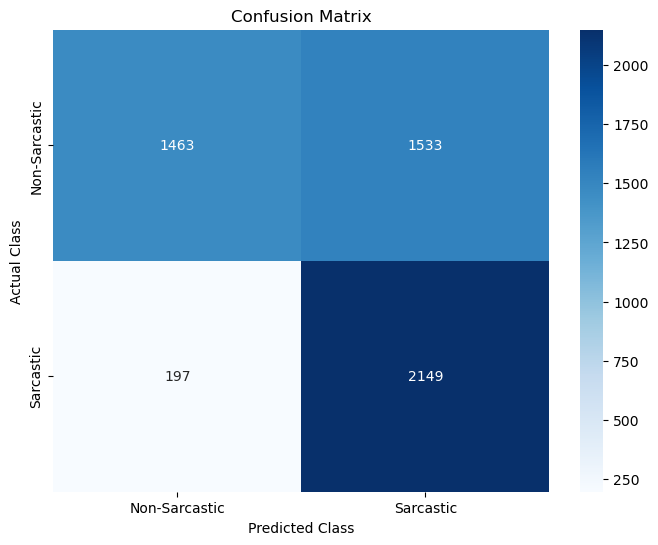

In [40]:
# Calculate metrics.
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print metrics.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix.
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create labels for the plot.
class_names = ['Non-Sarcastic', 'Sarcastic']

# Create the heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title.
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')

# Display the plot.
plt.show()

**Save Results to a .csv File**

In [41]:
# Create a DataFrame with actual and predicted labels.
results_dt_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Save to a CSV file.
results_dt_df.to_csv('sarcasm_detection_results_dt.csv', index=False)